# **6 Statistische Modelle - Beispiel 1: Lineare Regression**
------------------------------------------------

## a) Notwendige Bibliotheken laden

**LIBRARIES:**

* pandas für Verarbeitung von Tabellen-Daten
* numpy für die Berechnung von Zusammenhängen (z.B. Korrelationen)
* missingno für die Visualisierung von fehlenden Datenpunkten
* matplotlib, seaborn, plotly für die Visualisierung

* scikit learn - machine learning Bibliothek


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
import plotly.express as px

from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

# *Datensatz werbung.csv - Metadaten*
---------------------------------------------------

Testdatensatz explizit erstellt für die Übung "Statistische Modelle mit numerischen Variablen", bestehend aus drei unabhängigen (TV, Radio, Zeitung) und einer abhängigen Variablen (Sales).


## b) Daten einlesen und inspizieren

In [2]:
df = pd.read_csv('werbung.csv')
df.head()

,TV,Radio,Zeitung,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TV       200 non-null    float64
 1   Radio    200 non-null    float64
 2   Zeitung  200 non-null    float64
 3   Sales    200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## c) Fehlende Werte

*   Abfrage mit function isnull
*   **Visualisierung** mit missingno



In [5]:
for col in df.columns:
    pct_missing = df[col].isnull().sum()
    print(f'{col} - {pct_missing :}')

TV - 0
Radio - 0
Zeitung - 0
Sales - 0


## d) Null-Werte im Datensatz?

In [24]:
df_f = df.loc[(df['TV'] <= 1) | (df['Radio'] <= 1) | (df['Sales'] <= 1)]
df.drop(df_f.index, inplace=True)
print(df_f)

       TV  Radio  Zeitung  Sales
107  90.4    0.3     23.2   12.0
108  13.1    0.4     25.6    5.3
117  76.4    0.8     14.8    9.4
127  80.2    0.0      9.2   11.9
130   0.7   39.6      8.7    1.6


## e) Duplikate

redundante Datenpunkte finden und entfernen

In [25]:
df.duplicated().sum()

0

## f) Ausreißer

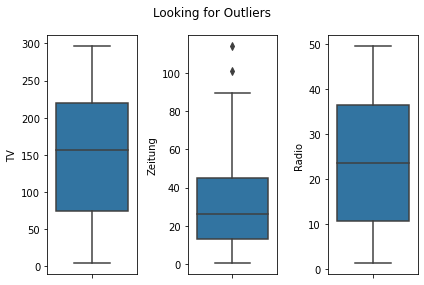

In [26]:
# Outlier Analysis
fig, axes = plt.subplots(1,3)
fig.suptitle('Looking for Outliers')
sns.boxplot(  y="TV", data=df,  orient='v' , ax=axes[0])
sns.boxplot(  y="Zeitung", data=df,  orient='v' , ax=axes[1])
sns.boxplot(  y="Radio", data=df,  orient='v' , ax=axes[2])
plt.tight_layout()

**Ausreißer sind vernachlässigbar!**

## g) Erste Übersicht visualisieren

hilfreich zur Bewertung der Datenqualität

In [27]:
df.describe()

,TV,Radio,Zeitung,Sales
count,195.000000,195.000000,195.000000,195.000000
mean,149.475385,23.649744,30.919487,15.312308
std,85.362824,14.621212,21.906656,5.185602
min,4.100000,1.300000,0.300000,3.200000
25%,74.900000,10.700000,12.850000,11.150000
50%,156.600000,23.600000,26.400000,16.100000
75%,220.050000,36.550000,45.150000,19.300000
max,296.400000,49.600000,114.000000,27.000000


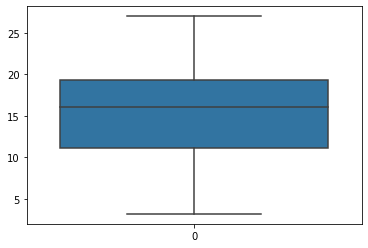

In [28]:
# die abhängige Variable "Sales"
sns.boxplot(df['Sales'])
plt.show()

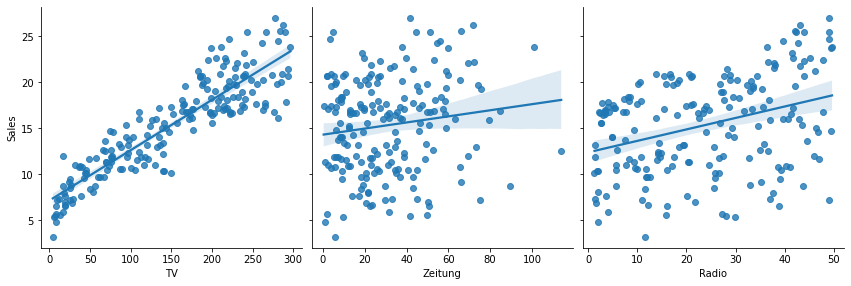

In [30]:
# Wie hängt "Sales" (=y) von den drei anderen Variablen ab?
sns.pairplot(df, x_vars=['TV', 'Zeitung', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='reg')
plt.show()

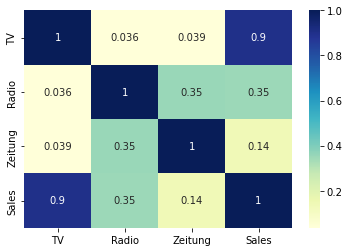

In [31]:
# Gibt es Korrelationen?
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

Beide Grafiken zeigen eine lineare Abhängigkeit der Verkaufszahlen von der TV-Werbung: Sales = f(TV)

# Statistisches Modell - lineare Regression

* Regressionsfunktion: y = beta_0 + beta_1 * X
* gegeben: y = Sales, X = TV
* gesucht: beta_0 und beta_1

In [32]:
# Verallgemeinerung für das Modell: X und y
X = df['TV']
y = df['Sales']

* Splitten des Datensatzes in einen "Trainings-Datensatz" und einen "Test-Datensatz"
* Bewährte Praxis:70% als Trainingsdaten und 30% als Testdaten (für Modellvalidierung)
* random_state sorgt für zufällige Auswahl (bei none werden jedes mal andere Samples ausgewählt, ansonsten eine Ganzzahl)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train.head()

3      151.5
190     39.5
26     142.9
123    123.1
126      7.8
Name: TV, dtype: float64

* Anwenden des statistischen Modells - Lineare Regression
* statsmodels fittet eine Kurve durch den Koordinatenursprung - manuelle Addition eines "Intercepts"
* Fitten der geraden mittels Ordinary Least Squares

In [34]:
import statsmodels.api as sm

# Addiere Konstante auf die X-Werte
X_train_sm = sm.add_constant(X_train)

# Fitten einer Regressionsgeraden mit Ordinary Least Squares 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Übersicht über die Parameter
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     590.6
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           5.92e-51
Time:                        11:52:13   Log-Likelihood:                -308.15
No. Observations:                 136   AIC:                             620.3
Df Residuals:                     134   BIC:                             626.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0949      0.402     17.633      0.0

**Da steckt viel Info drin!**

* **R^2 = 0.81:** das bedeutet das 81% der Varianzen in Sales durch TV erklärbar sind (starke Korrelation)
* **TV-P = 0.000:** ein sehr kleiner Koeffizient bedeutet hier, dass TV statistisch signifikant ist und der Zusammenhang nicht zufällig ist
* F-Statistics: Angabe zur Modellanpassung
* **Prob (F-statistic) = 1.52e-52:** sehr kleiner P-Wert, Modell-Anpassung hat statistische Signifikanz
* Die Regressionsgerade hat folgende Funktion:   **Sales = 7.0949 + 0.0547 * TV**

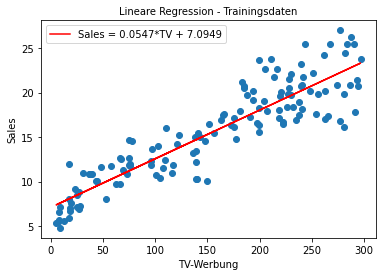

In [36]:
# Grafik mit Regressionsgerade
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.0949 + 0.0547*X_train, 'r', label='Sales = 0.0547*TV + 7.0949')
plt.title('Lineare Regression - Trainingsdaten', fontsize=10)
plt.xlabel('TV-Werbung')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Modell-Evaluation

> Die Regressionsgerade passt gut in unsere Daten. Aber wir wollen noch zeigen, wie gut / robust unser Modell ist?

* Wir berechnen für unsere X-Trainingdaten Modell-y-Werte und vergleichen sie mit den "echten" y-Werten
* Erkennen wir ein Muster in den Fehlern?




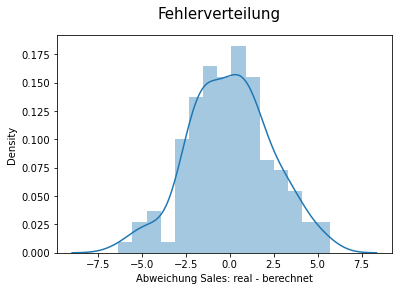

In [37]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Fehlerverteilung', fontsize = 15)
plt.xlabel('Abweichung Sales: real - berechnet', fontsize = 10)
plt.show()

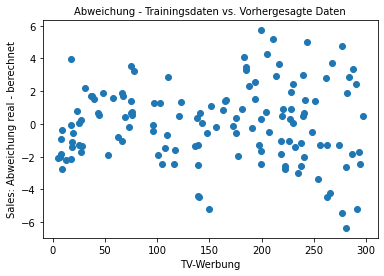

In [38]:
# Muster in der Fehlerverteilung?
plt.scatter(X_train,res)
plt.title('Abweichung - Trainingsdaten vs. Vorhergesagte Daten', fontsize=10)
plt.xlabel('TV-Werbung')
plt.ylabel('Sales: Abweichung real - berechnet')
plt.show()

# Anwendung des Modells für Vorhersagen

> jetzt spielen wir mit Daten, die das Modell noch nicht gesehen hat

* wir haben den Algorithmus mit Daten "trainiert"
* wir haben ein Modell gefunden, mit dem wir für unsere Trainingsdaten gute Vorhersagen erzielt haben
* jetzt wollen wir das Modell auf unbekannte Daten anwenden: der Testdatensatz

In [39]:
# Addiere Konstante auf X_test
X_test_sm = sm.add_constant(X_test)

# Vorhersage von y-Werten für X_test_sm
y_pred = lr.predict(X_test_sm)
y_pred.head()

169    22.646408
193    16.219019
151    13.713704
131    21.601615
156    12.231302
dtype: float64

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Checkt den R^2 zwischen y-Test und y-Predicted
r_squared = r2_score(y_test, y_pred)
r_squared

0.7780017313159692

Bei einem R^2 = 0.79 können wir von einer guten Anpassung zwischen Modell und Testdaten ausgehen.

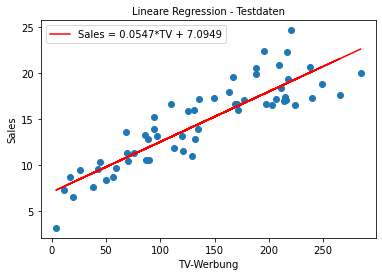

In [43]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.0949 + 0.0547 * X_test, 'r', label='Sales = 0.0547*TV + 7.0949')
plt.title('Lineare Regression - Testdaten', fontsize=10)
plt.xlabel('TV-Werbung')
plt.ylabel('Sales')
plt.legend()
plt.show()

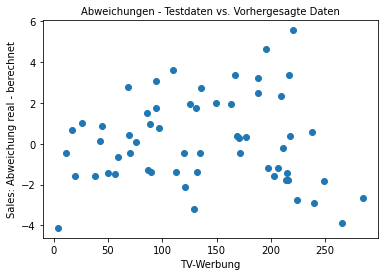

In [42]:
res2 = (y_test - y_pred)
plt.scatter(X_test,res2)
plt.title('Abweichungen - Testdaten vs. Vorhergesagte Daten', fontsize=10)
plt.xlabel('TV-Werbung')
plt.ylabel('Sales: Abweichung real - berechnet')
plt.show()

# Zusammenfassung

Die Variabilität der Verkaufszahlen können zu ca. 80% durch die Variabilität der Werbung im TV erklären. Das aus den Trainingsdaten gefundene statistische Modell zeigt eine signifikante lineare Abhängigkeit, welches die Varianz in den Testdaten zu 78% erklärt. 

--> Verbesserungspotential?